## Rainfall Prediction - Weather Forecasting
### Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


### Importing all the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

#classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, plot_roc_curve, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error

In [3]:
#getting the data and converting it into dataframes

data = pd.read_csv('weatherAUS.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [4]:
#getting the name of all columns
print('Name of the columns available :\n',data.columns, '\n','*'*60)

#Let us check the different columns and datatypes present in the dataset
data.info()

Name of the columns available :
 Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object') 
 ************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null  

In [5]:
#let us check the statistics and understand the columns for further data analysis.
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [6]:
#checking the number of rows and columns in the dataset
print(data.shape)

#checking if there is any null values in the columns
data.isnull().sum()

(8425, 23)


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

## Observation:

#### * We have the data of past 10 years of different states in Australia. There are 8425 rows and 23 attributes,based on which we need to predict. 
1. There are null values present in the the dataset, we need to check if they are to be removed from dataset or some imputation methods are to be used to remove null values.
2. The data seems normally distributed.

### Let us check the unique values for different categorical attributes.

#### We will use Label encoding methods to replace the categorical values into numerical values. 

In [7]:
data['Date'].value_counts()

2011-03-28    5
2011-03-03    5
2011-03-11    5
2011-05-22    5
2011-02-01    5
             ..
2013-05-10    1
2012-11-17    1
2013-03-01    1
2012-11-21    1
2013-04-20    1
Name: Date, Length: 3004, dtype: int64

In [8]:
data['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [9]:
data['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [10]:
data['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [11]:
data['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [12]:
data['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [13]:
data['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

#### There are 12 different location values which are to be encoded, the Highest WindGustDir was seen from North, 

#### Wind direction was highest from North at 9 am, and at WindDir3pm it was highest seen from South East.

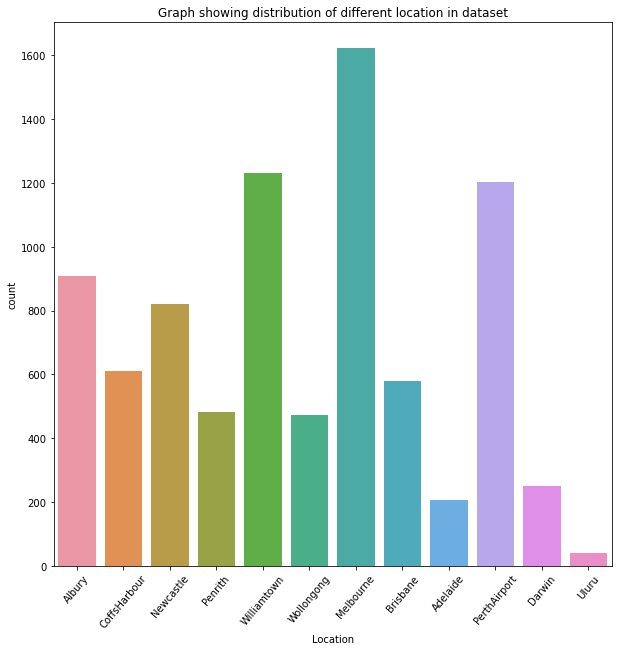

In [14]:
plt.figure(figsize=(10,10), facecolor='white')
sns.countplot(data['Location'])
plt.title('Graph showing distribution of different location in dataset')
plt.xticks(rotation=50)
plt.show()

### We can see that Melbourne: 1622, Williamtown: 1230, PerthAirport: 1204 makes highest part of the overall dataset.

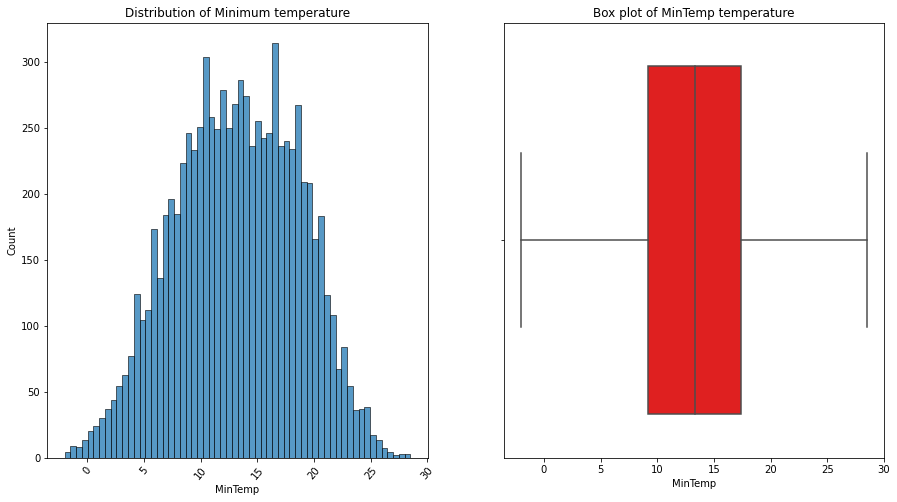

In [15]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['MinTemp'],bins=60)
plt.xticks(rotation=50)
plt.title('Distribution of Minimum temperature')

ax = plt.subplot(1,2,2)
sns.boxplot(data['MinTemp'],orient='h', color='red')
plt.title('Box plot of MinTemp temperature')

plt.show()

#### The average temperature of different location has been distributed around the mean of 13 degrees. And maximum temperature observed was 28 degrees. The data seems Normally distributed.

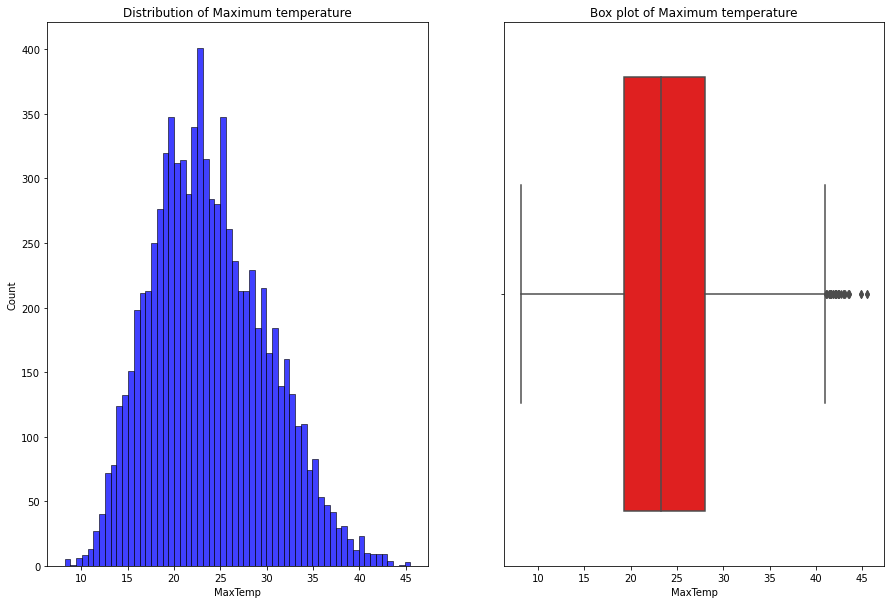

In [16]:
plt.figure(figsize=(15,10), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['MaxTemp'],bins=60, color='blue')
plt.title('Distribution of Maximum temperature')

ax = plt.subplot(1,2,2)
sns.boxplot(data['MaxTemp'],orient='h', color='red')
plt.title('Box plot of Maximum temperature')

plt.show()

#### The data of Maximum temperature is normally distributed and there seems few outliers which need to be treated. Highest Max temperature observed was 45 degrees.

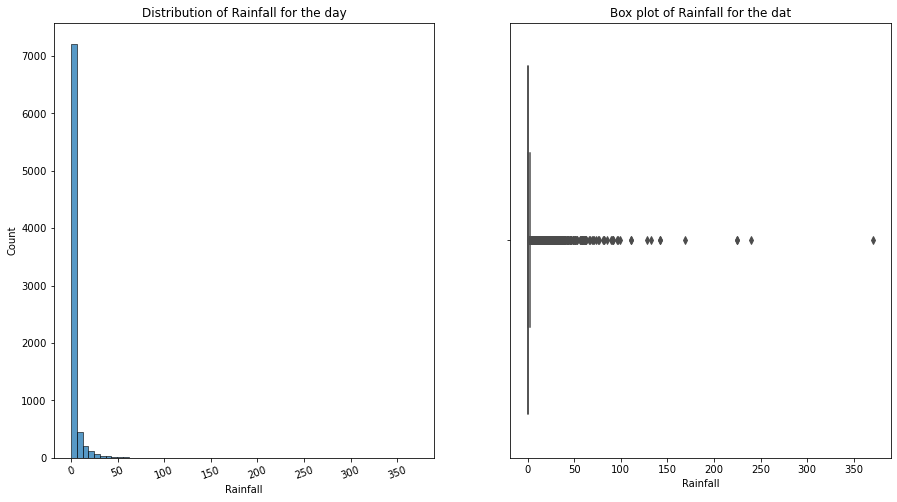

In [17]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(x=data['Rainfall'],bins=60)
plt.title('Distribution of Rainfall for the day')
plt.xticks(rotation=20)
ax = plt.subplot(1,2,2)
sns.boxplot(data['Rainfall'],orient='h', color='red')
plt.title('Box plot of Rainfall for the dat')
plt.show()

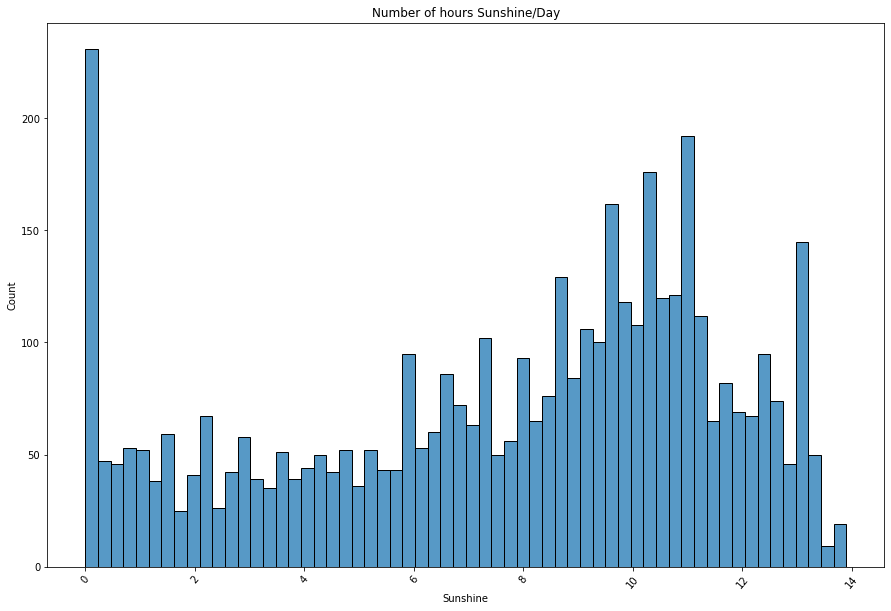

In [18]:
plt.figure(figsize=(15,10), facecolor='white')
sns.histplot(data['Sunshine'],bins=60)
plt.xticks(rotation=50)
plt.title('Number of hours Sunshine/Day')
plt.show() 

#### 1. Average data of rainfall for the day is distributed around mean of 2 mm , and many outliers seen in rainfall data,
#### 2. Number of hours Sunshine in the day, varies around the mean of 8 hrs, we can see righ skewness in the data. 

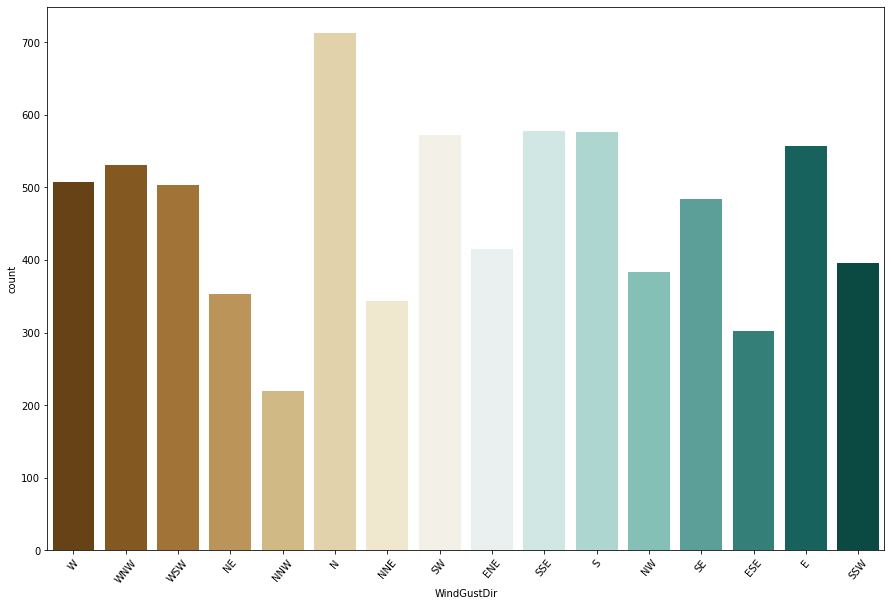

In [19]:
plt.figure(figsize=(15,10), facecolor='white')
sns.countplot(data['WindGustDir'],palette='BrBG')
plt.xticks(rotation=50)
plt.show()

#### The direction of wind gust is towords north the highest times,

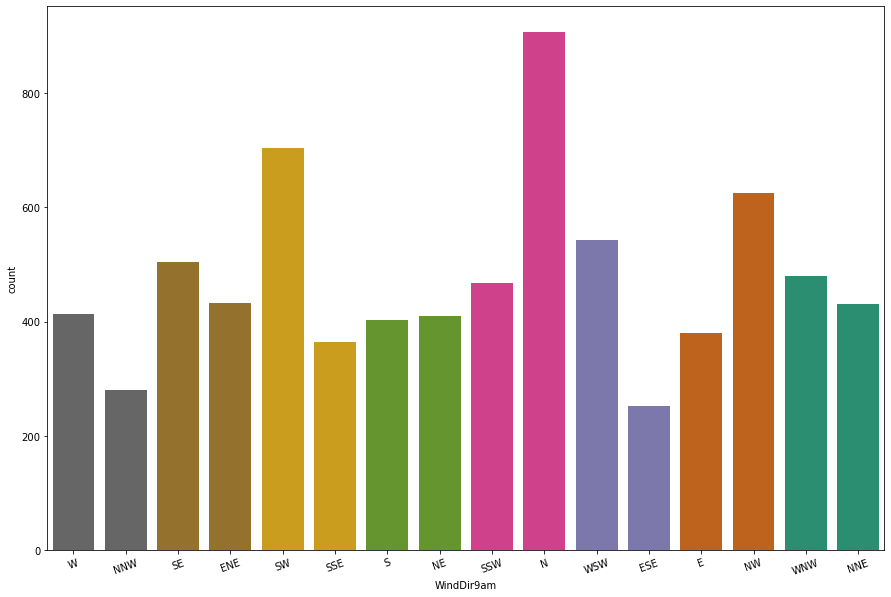

In [20]:
plt.figure(figsize=(15,10), facecolor='white')
sns.countplot(data['WindDir9am'],palette='Dark2_r')
plt.xticks(rotation=20)
plt.show()

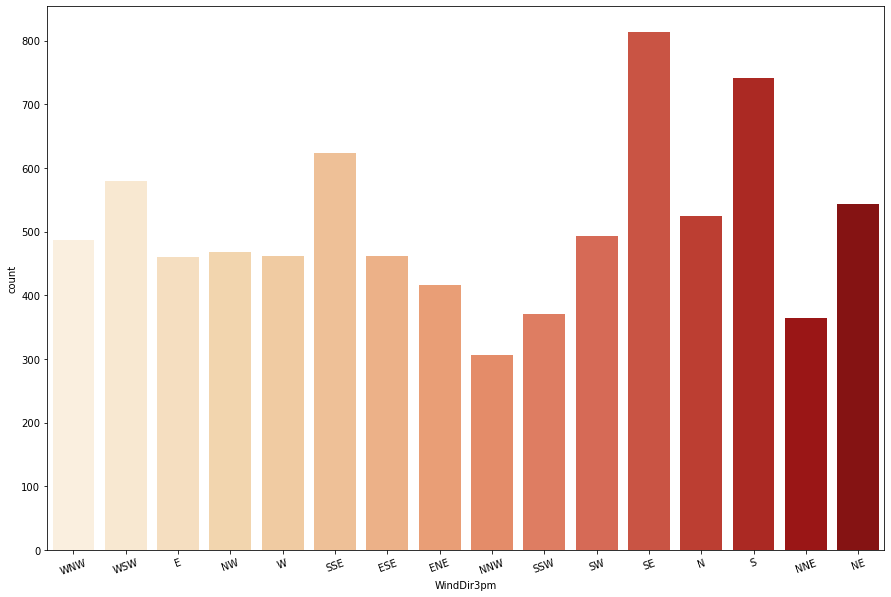

In [21]:
plt.figure(figsize=(15,10), facecolor='white')
sns.countplot(data['WindDir3pm'],palette='OrRd')
plt.xticks(rotation=20)
plt.show()

#### On an average Wind Direction  at 3 pm is 300 hrs over the period and Wind Direction  at 9am 250 hrs.  

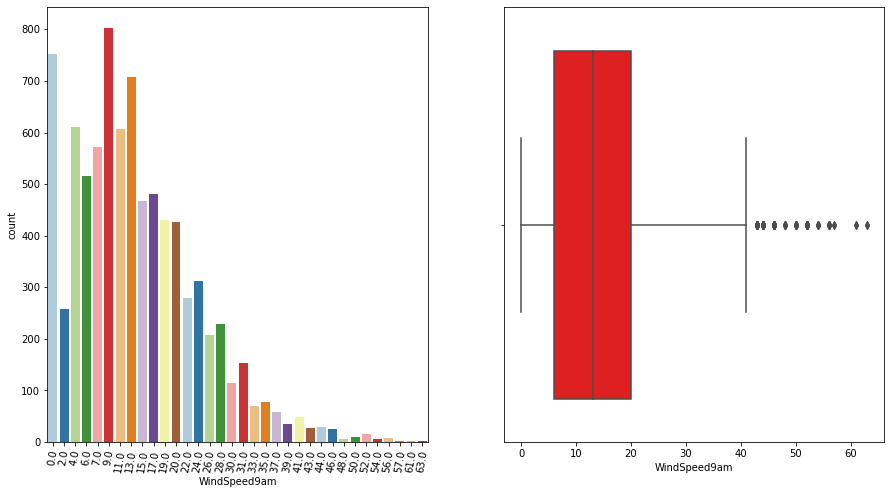

In [22]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(data['WindSpeed9am'],palette='Paired')
plt.xticks(rotation=80)

ax = plt.subplot(1,2,2)
sns.boxplot(data['WindSpeed9am'],orient='h', color='red')
plt.show()

#### Wind speed at 9 am is skewwed towards left, and some outliers present in the dataset.

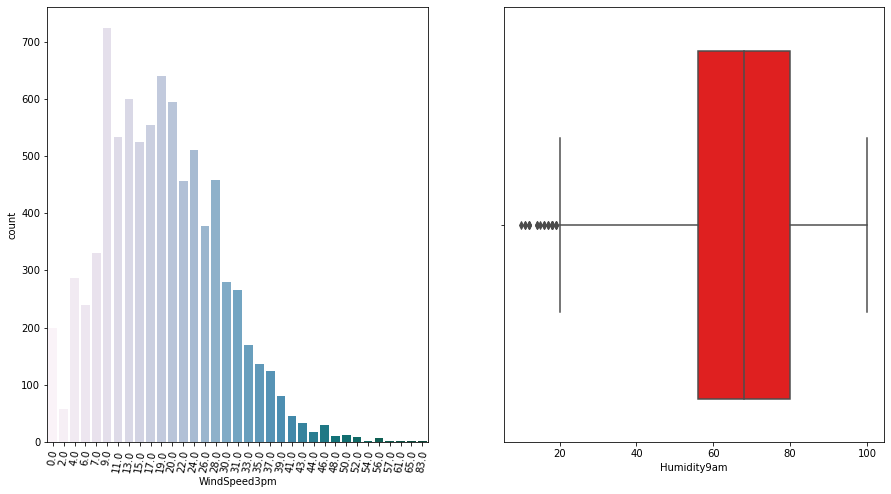

In [23]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(data['WindSpeed3pm'],palette='PuBuGn')
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2)
sns.boxplot(data['Humidity9am'],orient='h', color='red')

plt.show()

#### We see some skewness in the data, and there are outliers which need to be treated

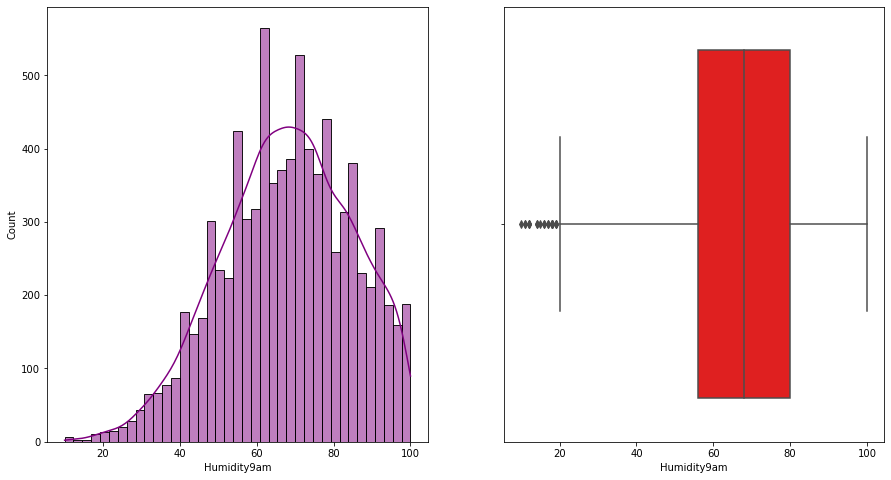

In [24]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['Humidity9am'],kde=True,color='purple')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Humidity9am'],orient='h', color='red')
plt.show()

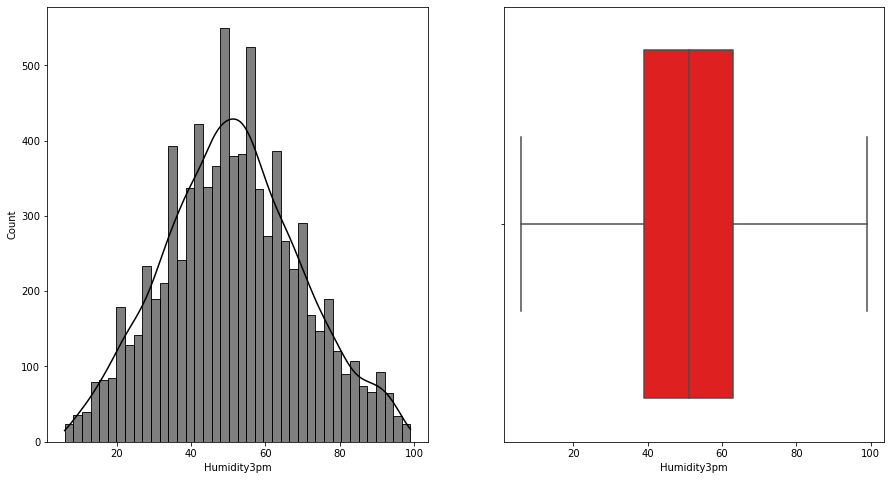

In [25]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['Humidity3pm'],kde=True,color='black')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Humidity3pm'],orient='h', color='red')

plt.show()

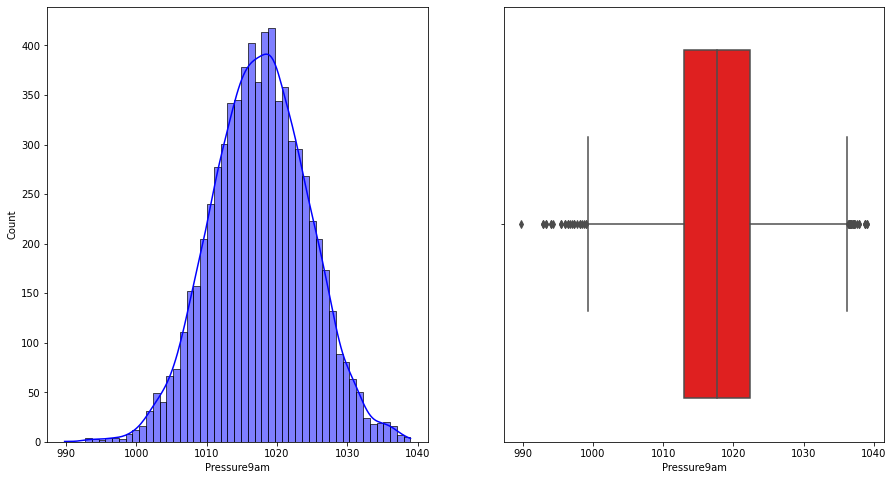

In [26]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['Pressure9am'],kde=True,color='blue')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Pressure9am'],orient='h', color='red')

plt.show()

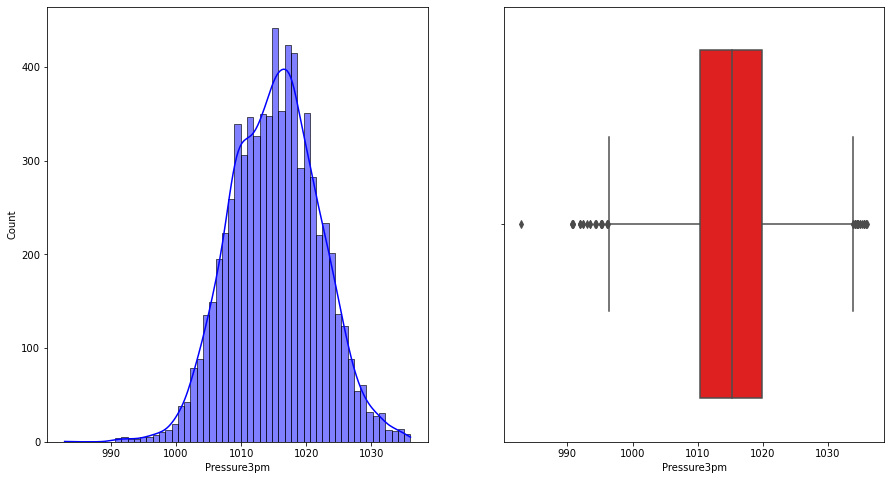

In [27]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['Pressure3pm'],kde=True, color='blue')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Pressure3pm'],orient='h', color='red')

plt.show()

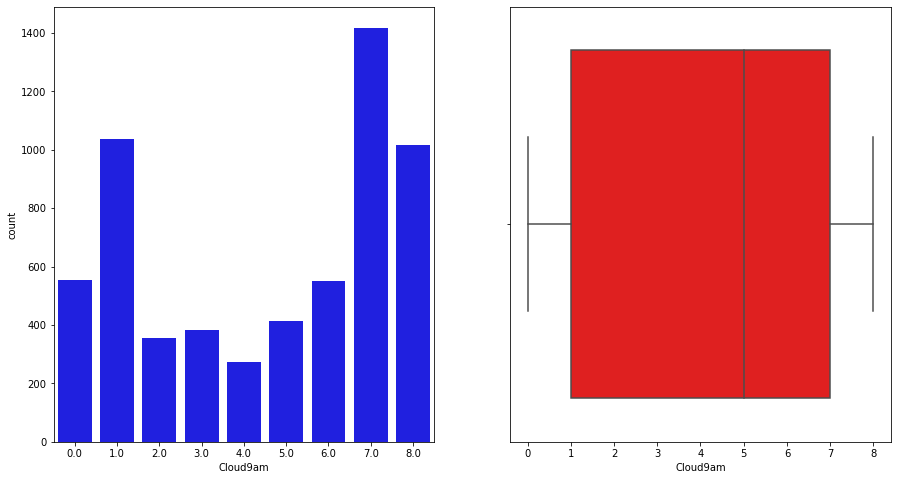

In [28]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(data['Cloud9am'], color='blue')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Cloud9am'],orient='h', color='red')

plt.show()

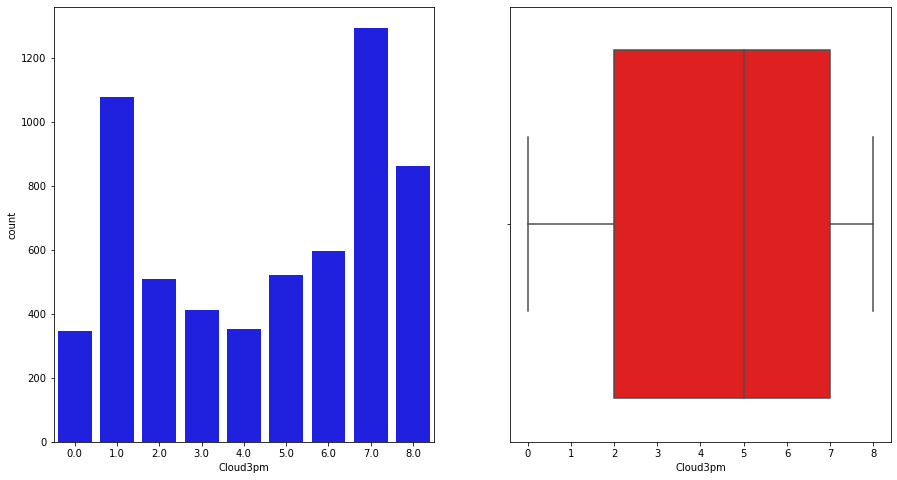

In [29]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(data['Cloud3pm'], color='blue')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Cloud3pm'],orient='h', color='red')

plt.show()

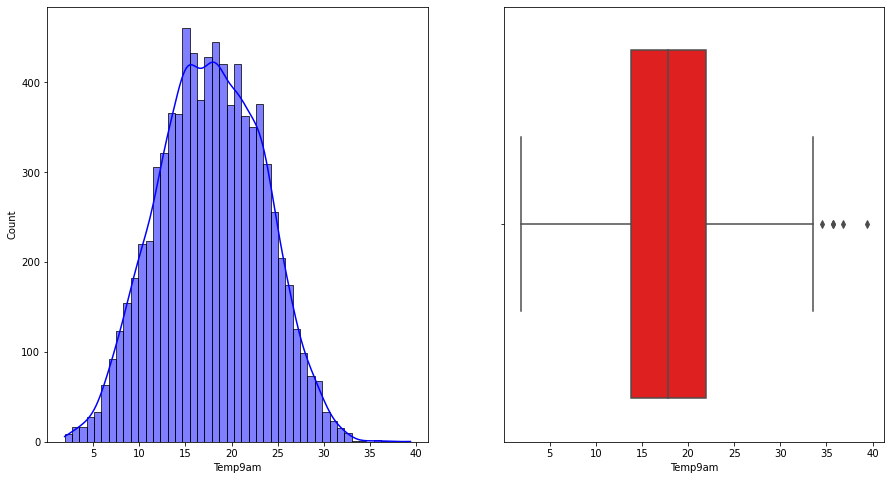

In [30]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['Temp9am'],kde=True,color='blue')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Temp9am'],orient='h', color='red')

plt.show()

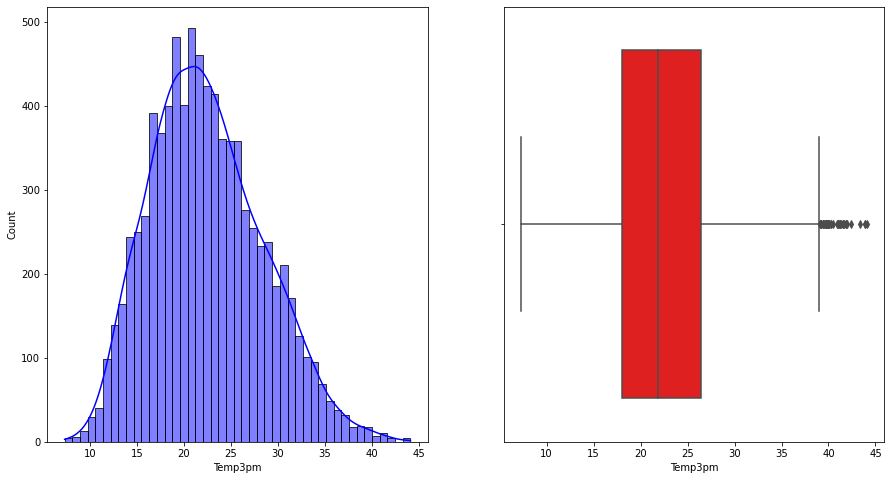

In [31]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(data['Temp3pm'],kde=True,color='blue')

ax = plt.subplot(1,2,2)
sns.boxplot(data['Temp3pm'],orient='h', color='red')

plt.show()

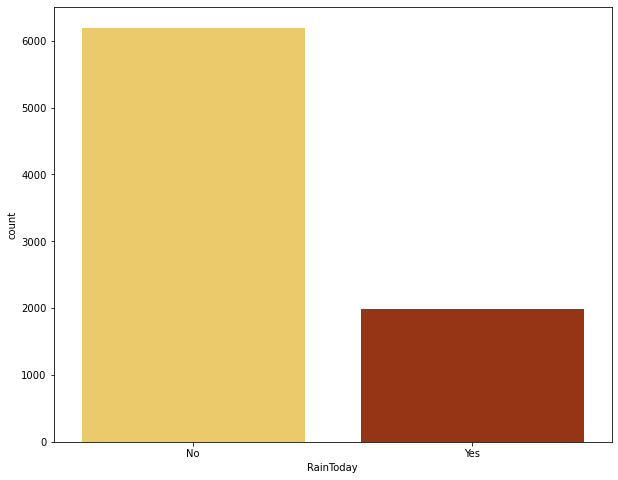

In [32]:
plt.figure(figsize=(10,8), facecolor='white') 
sns.countplot(data['RainToday'],palette='afmhot_r')

plt.show()

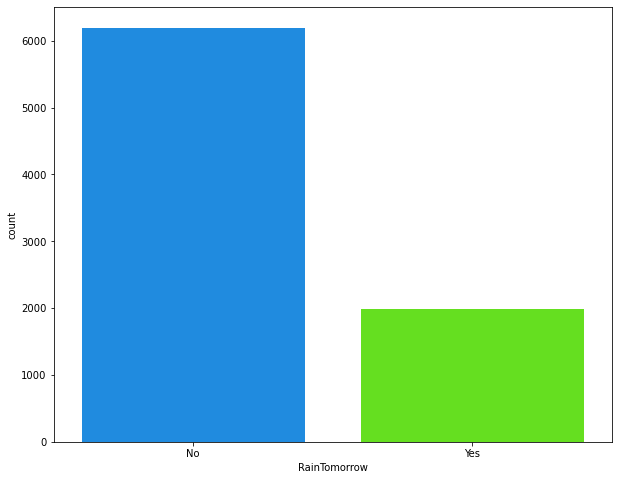

In [33]:
plt.figure(figsize=(10,8), facecolor='white') 
sns.countplot(data['RainTomorrow'],palette='gist_rainbow_r')

plt.show()

## Observation:
1. All the data seems to be normally distributed
2. RainToday and Raintommorow has unbalanced attribute
3. Few attributes are having outliers let us verify using other technique.

## Bi-Variate Analysis

Let us check the relationship of each attribute target variable 'RainTommorow'

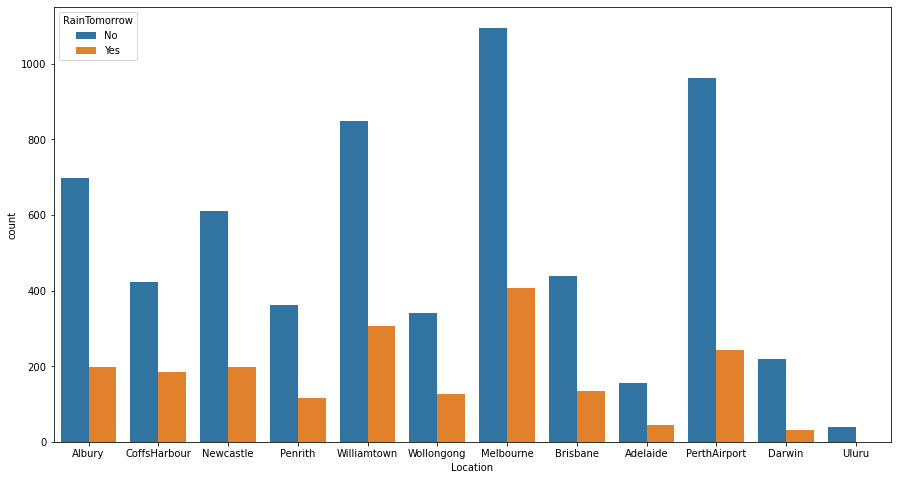

In [34]:
plt.figure(figsize=(15,8), facecolor='white')
sns.countplot(x='Location',hue='RainTomorrow',data=data)
plt.show()

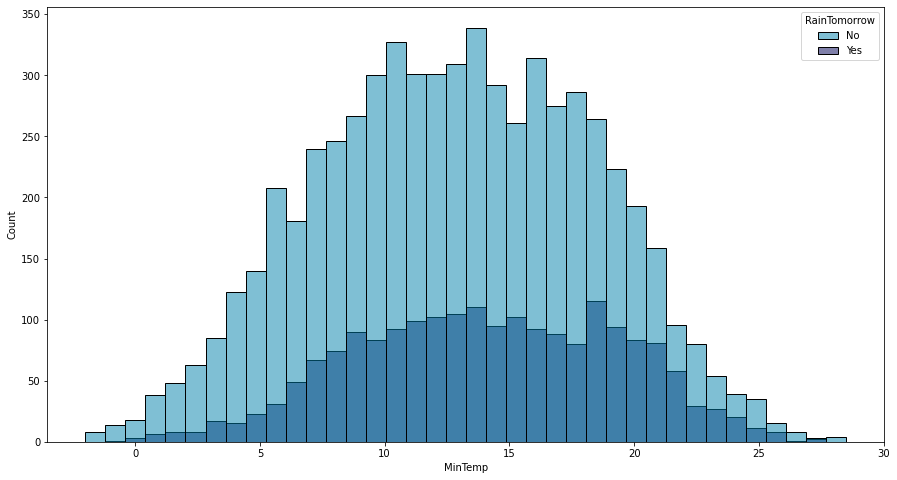

In [35]:
plt.figure(figsize=(15,8), facecolor='white')
sns.histplot(x='MinTemp',hue='RainTomorrow',data=data, palette='ocean_r')

plt.show()

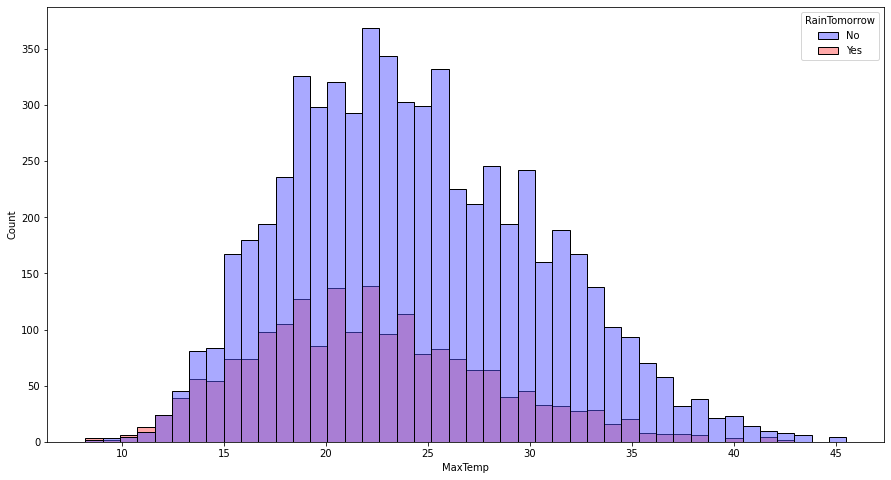

In [36]:
plt.figure(figsize=(15,8), facecolor='white')
sns.histplot(x='MaxTemp',hue='RainTomorrow',data=data, palette='seismic')

plt.show()

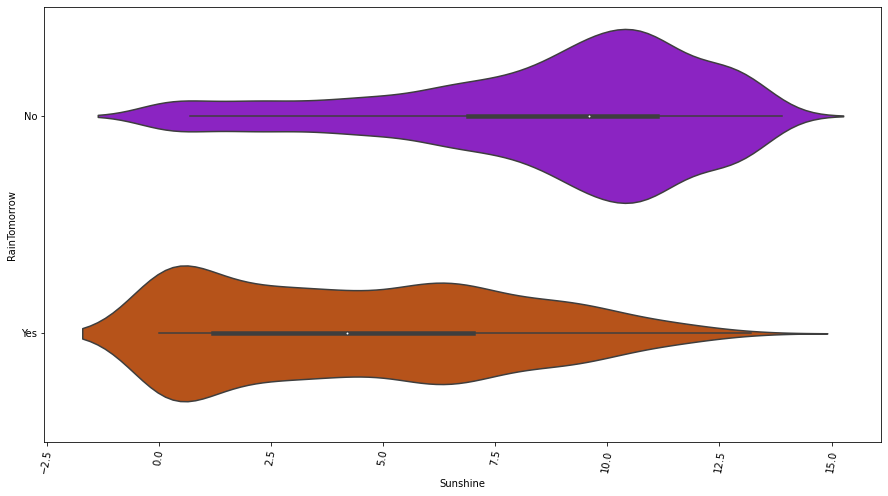

In [37]:
plt.figure(figsize=(15,8), facecolor='white')
sns.violinplot(x='Sunshine',y='RainTomorrow',data=data, palette='gnuplot')
plt.xticks(rotation=80)
plt.show()

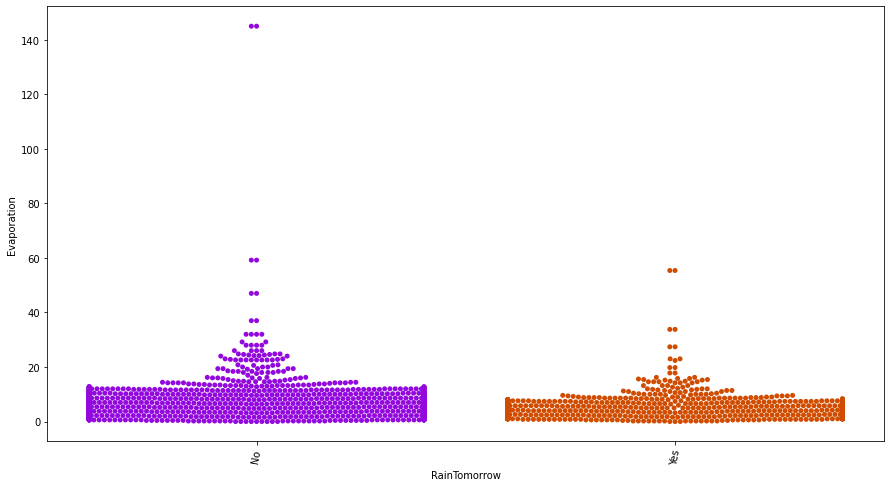

In [38]:
plt.figure(figsize=(15,8), facecolor='white')
sns.swarmplot(y='Evaporation',x='RainTomorrow',data=data, palette='gnuplot')
plt.xticks(rotation=80)
plt.show()

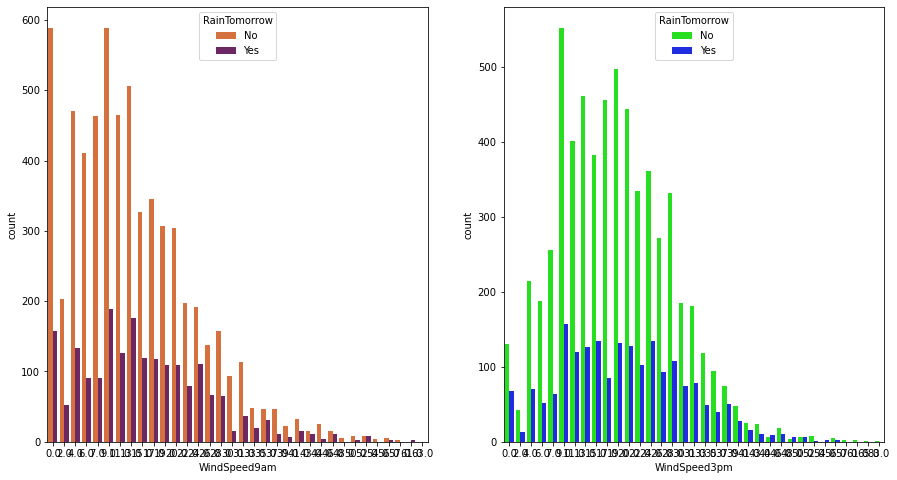

In [39]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='WindSpeed9am',hue='RainTomorrow',data=data, palette='inferno_r')
ax = plt.subplot(1,2,2)
sns.countplot(x='WindSpeed3pm',hue='RainTomorrow',data=data, palette='hsv')
plt.show()

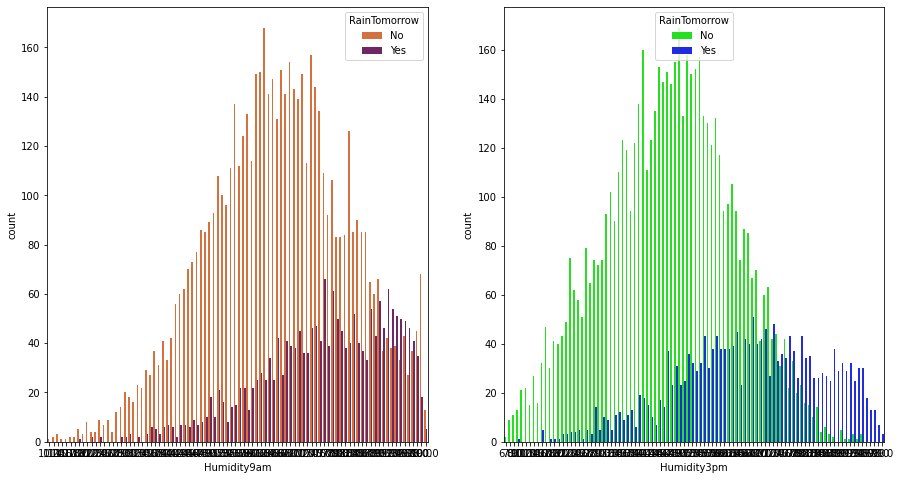

In [40]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='Humidity9am',hue='RainTomorrow',data=data, palette='inferno_r')
ax = plt.subplot(1,2,2)
sns.countplot(x='Humidity3pm',hue='RainTomorrow',data=data, palette='hsv')
plt.show()

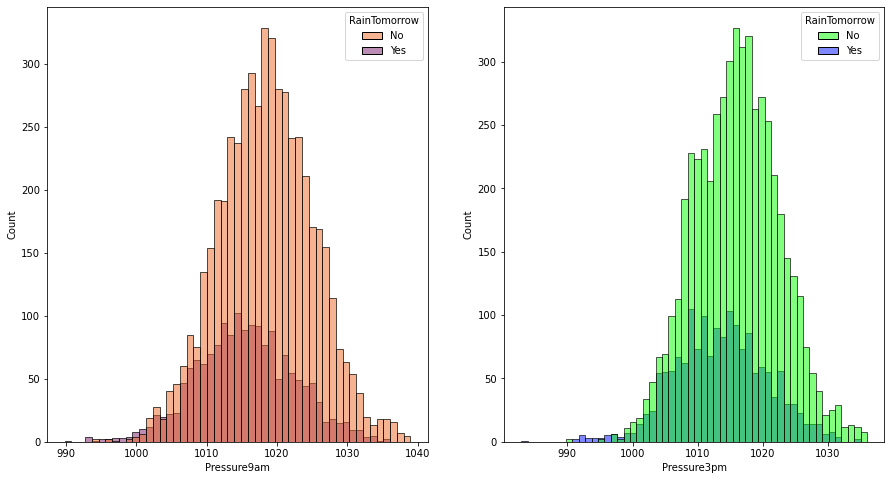

In [41]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(x='Pressure9am',hue='RainTomorrow',data=data, palette='inferno_r')
ax = plt.subplot(1,2,2)
sns.histplot(x='Pressure3pm',hue='RainTomorrow',data=data, palette='hsv')
plt.show()

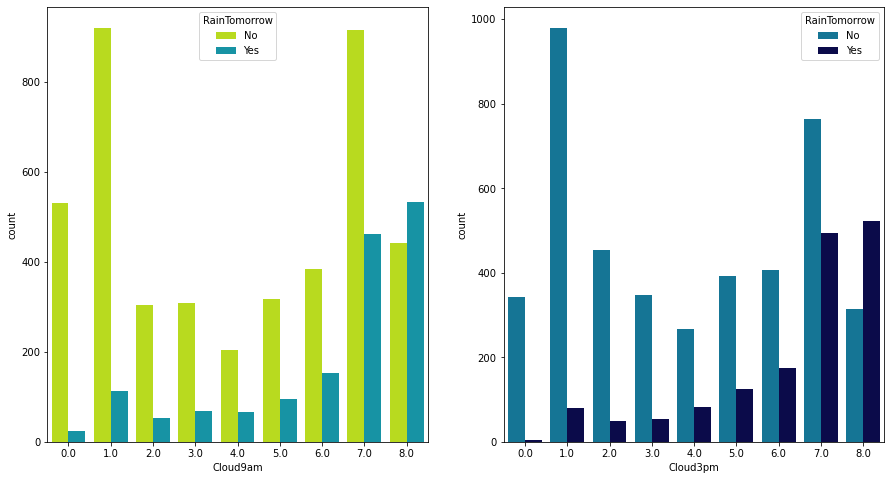

In [42]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.countplot(x='Cloud9am',hue='RainTomorrow',data=data, palette='nipy_spectral_r')
ax = plt.subplot(1,2,2)
sns.countplot(x='Cloud3pm',hue='RainTomorrow',data=data, palette='ocean_r')
plt.show()

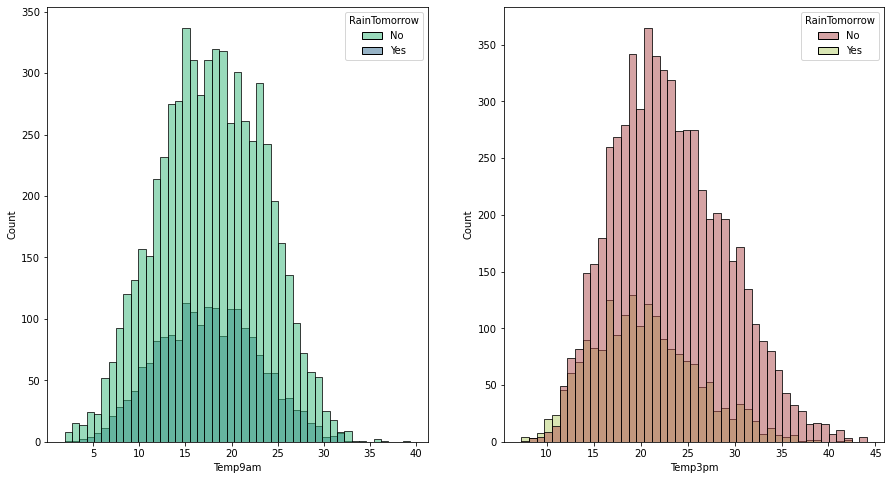

In [43]:
plt.figure(figsize=(15,8), facecolor='white')
ax = plt.subplot(1,2,1)
sns.histplot(x='Temp9am',hue='RainTomorrow',data=data, palette='viridis_r')
ax = plt.subplot(1,2,2)
sns.histplot(x='Temp3pm',hue='RainTomorrow',data=data, palette='tab20b_r')
plt.show()

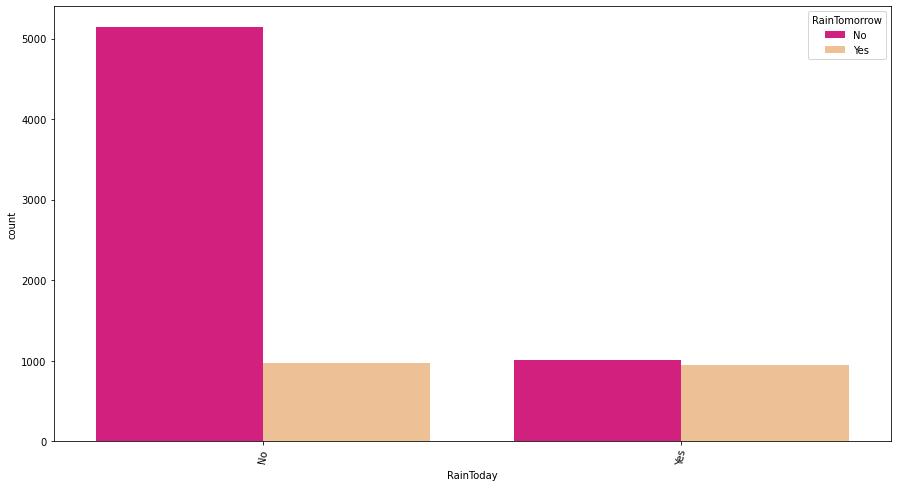

In [44]:
plt.figure(figsize=(15,8), facecolor='white')
sns.countplot(x='RainToday',hue='RainTomorrow',data=data, palette='Accent_r')
plt.xticks(rotation=80)
plt.show()

## Observations:
#### 1. By observing the above graphs we infere that data is normally distributed over the dataset. 
#### 2. The target variable is not balanced, we need to treat this using some minority class oversampling technique.
#### 3. Let us deal with deal with missing values. 
#### 4. Converting Categorical values into numerical data.

In [45]:
# let us check the unique values present in all categorical attributes
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [46]:
data['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [47]:
#let us fill the numerical missing values with median value.
data.fillna(data.median(),inplace=True)

#replacing all the categorical values null values with most_frequent value in the attribute
data['WindGustDir'].replace({np.nan:'N'},inplace=True)
data['WindDir9am'].replace({np.nan:'N'},inplace=True)
data['WindDir3pm'].replace({np.nan:'SE'}, inplace=True) 
data['RainToday'].replace({np.nan:0}, inplace=True)
data['RainTomorrow'].replace({np.nan:0}, inplace=True)

In [48]:
#replacing categorical values 'Yes; with 1 and 'No' with 0
data['RainToday'].replace({'Yes':1, 'No':0, 0:0}, inplace=True)
data['RainTomorrow'].replace({'Yes':1, 'No':0}, inplace=True)

data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### We will drop the Date column as this column donot help in predicting the target variable

In [49]:
data.drop(columns='Date', inplace=True)

lab_enc = LabelEncoder()
col =['Location','WindGustDir','WindDir9am','WindDir3pm']
for i in col:
    data[i] = lab_enc.fit_transform(data[i])
    
data.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

<Figure size 1440x1440 with 0 Axes>

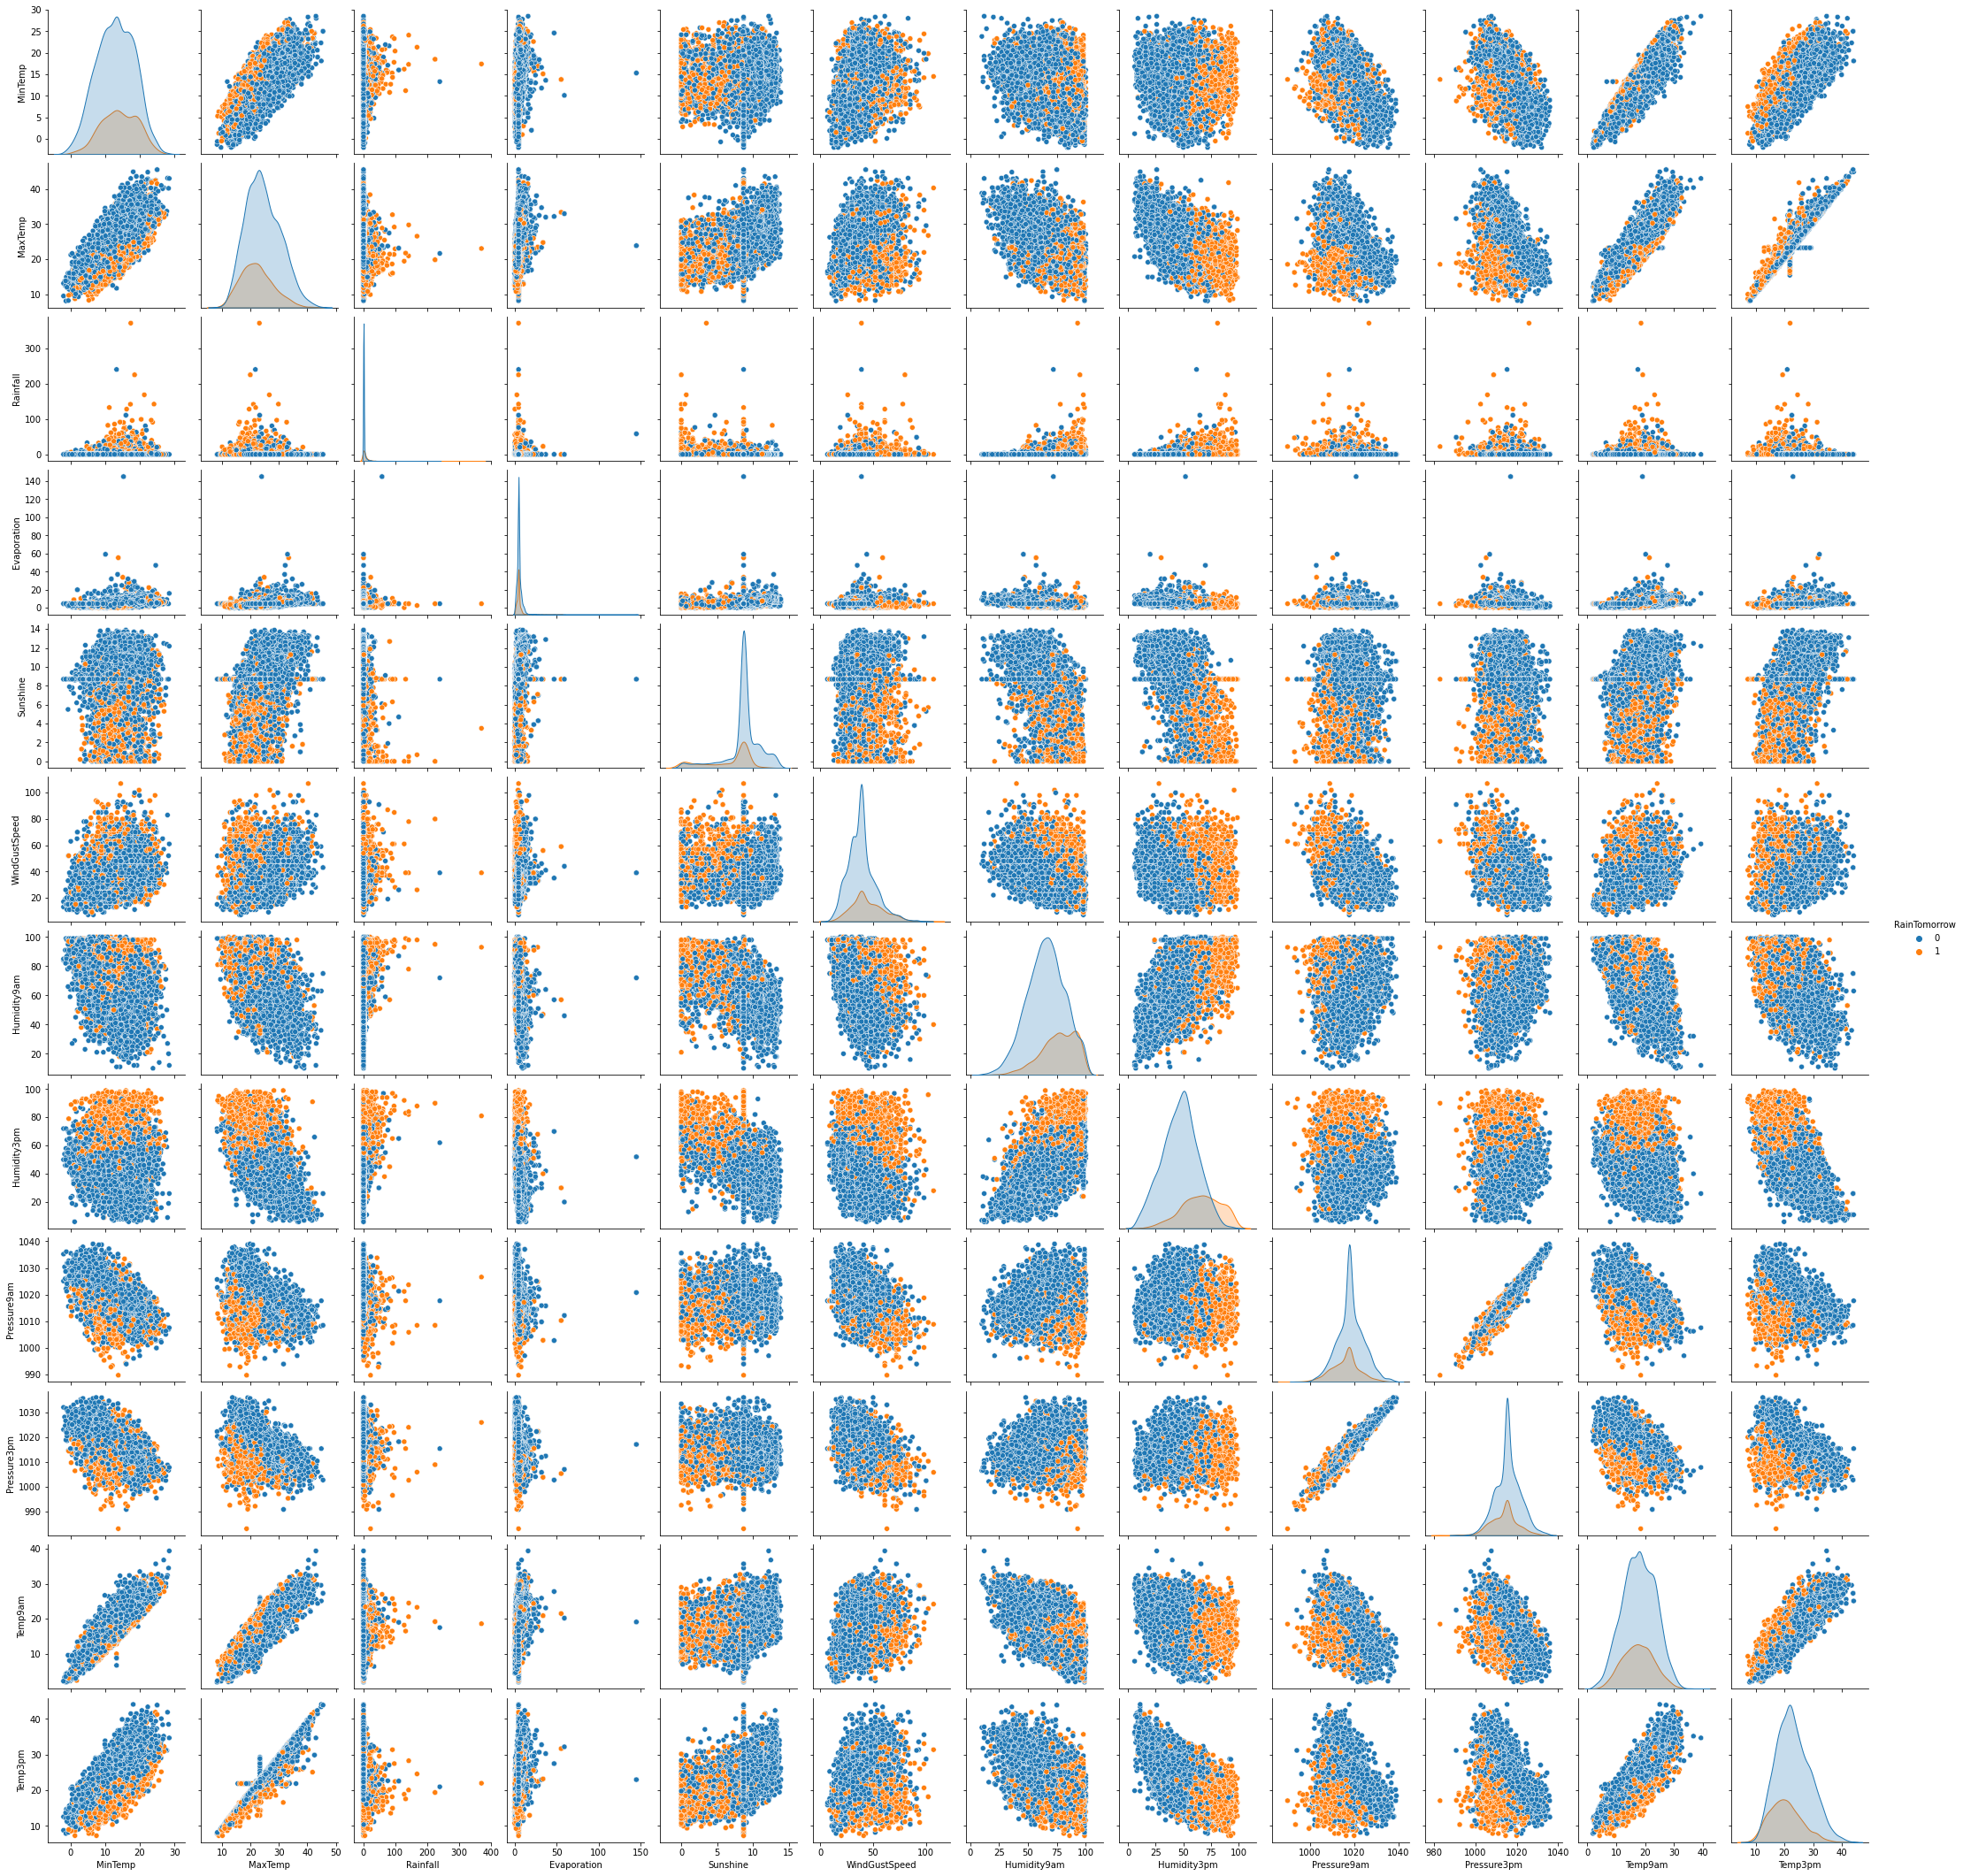

In [50]:
col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed',  'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm','RainTomorrow']
plt.figure(figsize=(20,20), facecolor='white')
sns.pairplot(data[col],hue='RainTomorrow')
plt.xticks(rotation=80)
plt.show()

#### We see from above pairplot that Pressure, Max Temp, Min temperature, Temperature at 3pm, Temperature at 9 am  of the attributes have linearity in the graph. Let us check if the attributes are correlated to each other.

In [51]:
corr1= data.corrwith(data['RainTomorrow']) 
corr1

Location         0.002824
MinTemp          0.092965
MaxTemp         -0.152672
Rainfall         0.219015
Evaporation     -0.060025
Sunshine        -0.321410
WindGustDir      0.051832
WindGustSpeed    0.190274
WindDir9am       0.032860
WindDir3pm       0.008918
WindSpeed9am     0.068235
WindSpeed3pm     0.053456
Humidity9am      0.271231
Humidity3pm      0.444830
Pressure9am     -0.163972
Pressure3pm     -0.135227
Cloud9am         0.270678
Cloud3pm         0.332197
Temp9am         -0.023206
Temp3pm         -0.193625
RainToday        0.312929
RainTomorrow     1.000000
dtype: float64

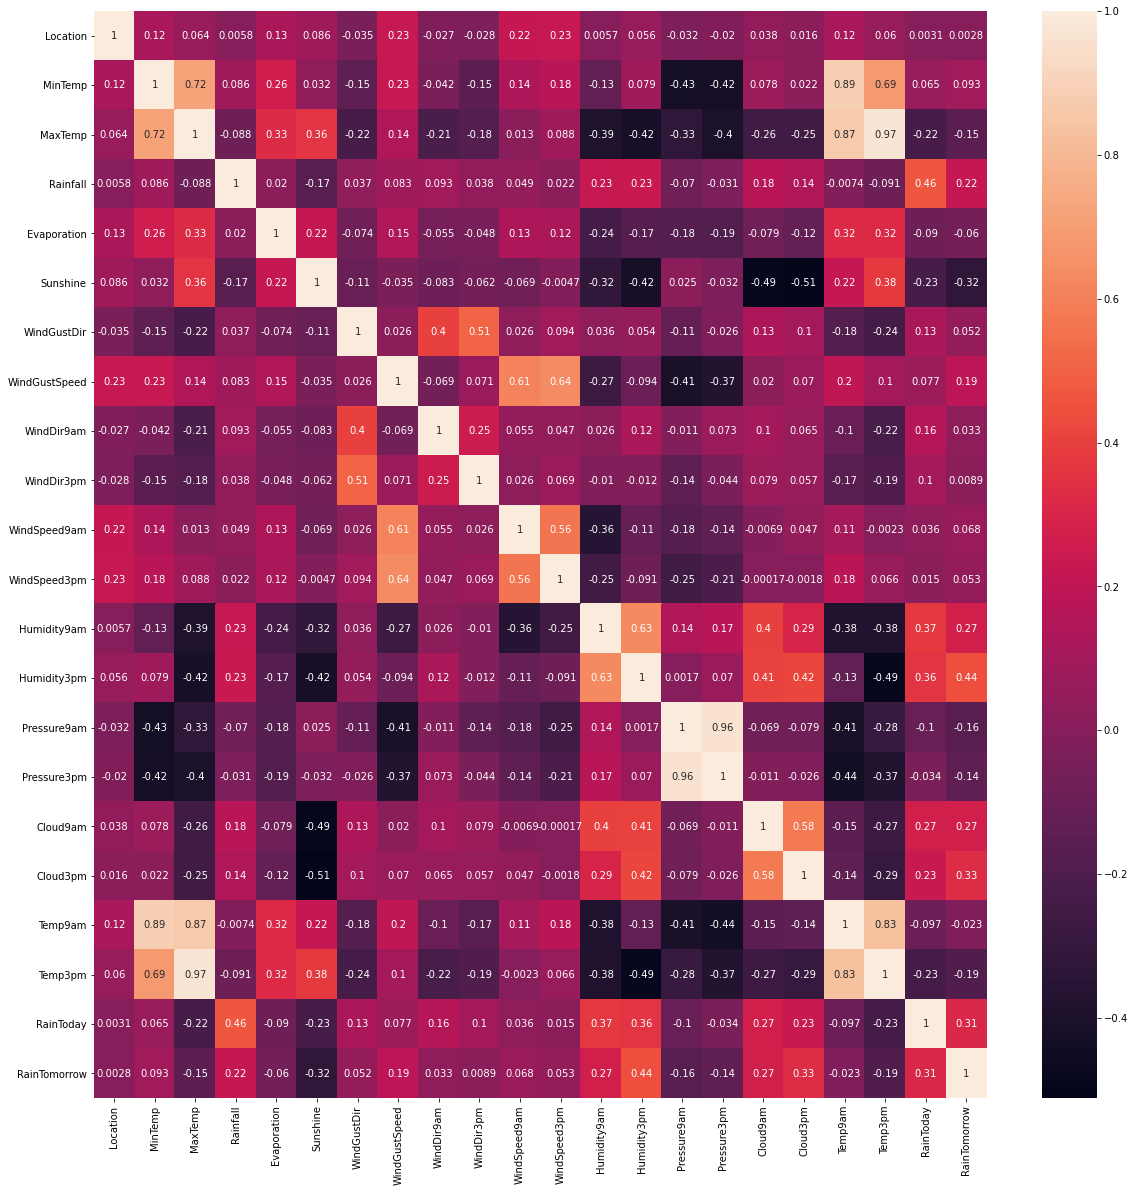

In [52]:
corr = data.corr()
plt.figure(figsize=(20,20), facecolor='white')
sns.heatmap(corr, annot=True) 
plt.show()

#### 1. Temp9am and Temp3pm, Cloud9am and Cloud3pm, Pressure9am and Pressure3pm, Humidity9am and Humidity3pm are having the correlation near to 1. 
####  2. Rain tommorow,  and Sunshine are negatively correlated.

## We have to check for outliers.
#### I have observed outliers in following attributes
MinTemp, MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm

In [53]:
print("Before Outlier removal",data.shape)
z_score = zscore(data[['MinTemp','MaxTemp','Evaporation','Rainfall','Sunshine','WindGustDir','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']])
abs_zsc = np.abs(z_score)

data = data[(abs_zsc<3).all(axis=1)]

print("After Outlier removal",data.shape)

Before Outlier removal (8425, 22)
After Outlier removal (7987, 22)


In [54]:
print('Total % of Outliers removed = ', (8425 - 7987)/8425*100)

Total % of Outliers removed =  5.198813056379822


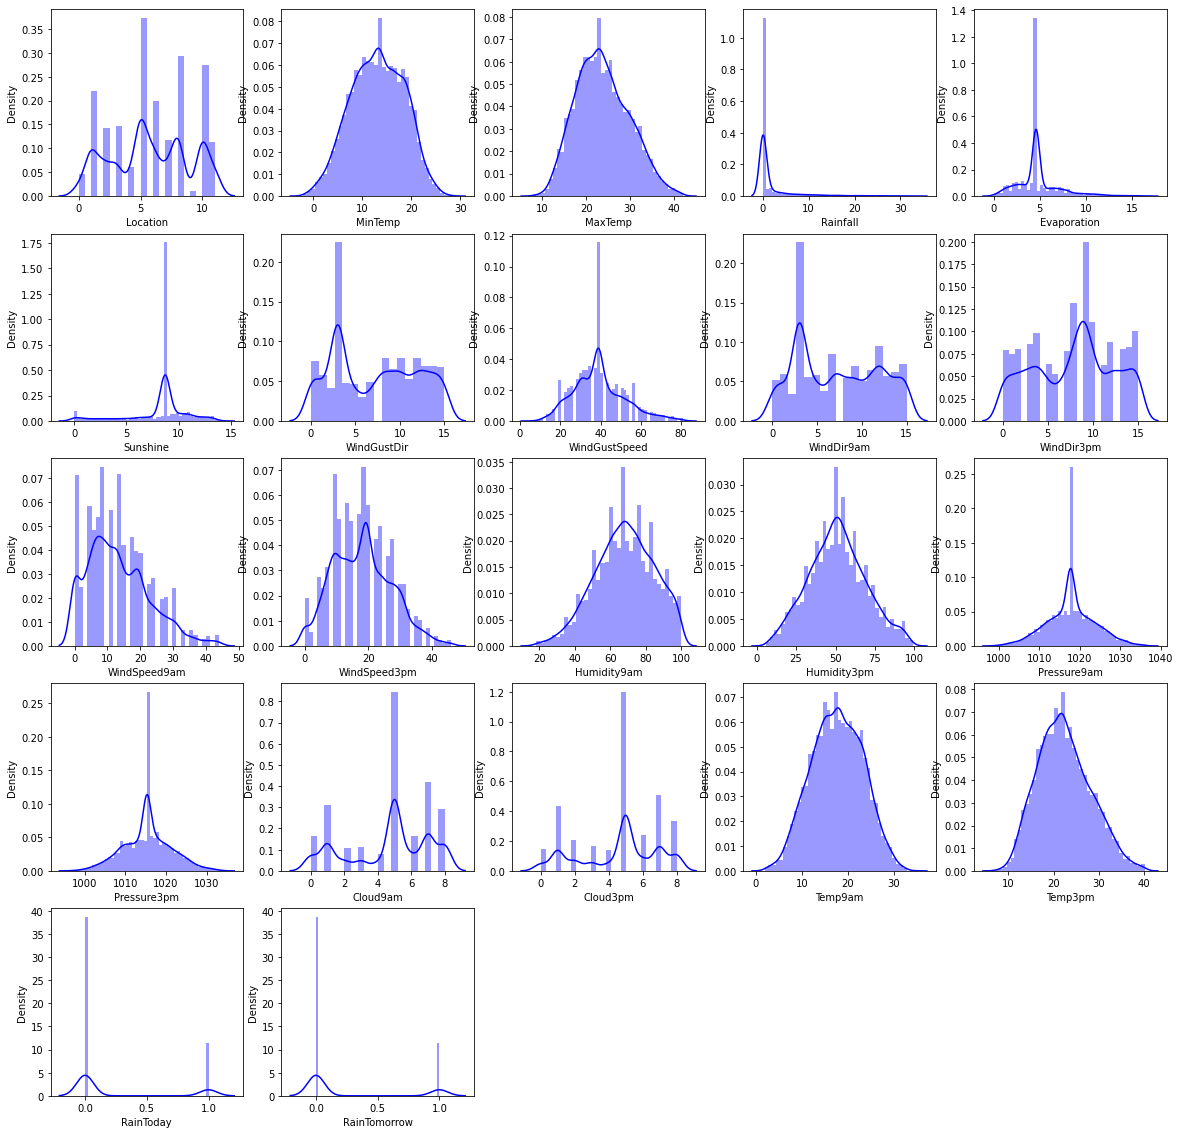

In [55]:
pltno=1
plt.figure(figsize=(20,20), facecolor='white')
for i in data.columns:
    if pltno <=22:
        ax =plt.subplot(5,5,pltno)
        sns.distplot(data[i], color='blue')
        pltno +=1
plt.show()

## Model Building

a) Rain tommorow or not

We have RainTommorrow as the target variable in this problem, hence we use classification methods.

In [56]:
X = data.drop(columns=['RainTomorrow'], axis=1)
y = data['RainTomorrow']

In [57]:
sm = SMOTE(0.75)

print('Number of class before fit', X.shape, y.shape)

X,y = sm.fit_resample(X,y)

print('Number of class after fit', X.shape,y.shape)

Number of class before fit (7987, 21) (7987,)
Number of class after fit (10788, 21) (10788,)


In [58]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

In [59]:
X_train,X_test, y_train, y_test = train_test_split(X_scalar, y, random_state=24, test_size=0.25)

## 1.  Logistic Regression

In [60]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.7508342602892102

 The CV score of Model : 0.7694972632620511

 The confusion Matrix :
  [[1254  282]
 [ 390  771]]

 The classification report:
                precision    recall  f1-score   support

           0       0.76      0.82      0.79      1536
           1       0.73      0.66      0.70      1161

    accuracy                           0.75      2697
   macro avg       0.75      0.74      0.74      2697
weighted avg       0.75      0.75      0.75      2697


 roc_auc_score:  0.7402444686692506
*******************************************


## 2. Random Forest Classifier

In [61]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred = ran_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ran_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.921394141638858

 The CV score of Model : 0.9108902243216562

 The confusion Matrix :
  [[1435  101]
 [ 111 1050]]

 The classification report:
                precision    recall  f1-score   support

           0       0.93      0.93      0.93      1536
           1       0.91      0.90      0.91      1161

    accuracy                           0.92      2697
   macro avg       0.92      0.92      0.92      2697
weighted avg       0.92      0.92      0.92      2697


 roc_auc_score:  0.9193187782622739
*******************************************


## 3. AdaBoosting

In [62]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ada_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8075639599555061

 The CV score of Model : 0.8083043524402358

 The confusion Matrix :
  [[1299  237]
 [ 282  879]]

 The classification report:
                precision    recall  f1-score   support

           0       0.82      0.85      0.83      1536
           1       0.79      0.76      0.77      1161

    accuracy                           0.81      2697
   macro avg       0.80      0.80      0.80      2697
weighted avg       0.81      0.81      0.81      2697


 roc_auc_score:  0.8014045340762275
*******************************************


## 4. Gradient Boosting

In [63]:
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
y_pred = grad_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(grad_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8461253244345569

 The CV score of Model : 0.8458781725965837

 The confusion Matrix :
  [[1360  176]
 [ 239  922]]

 The classification report:
                precision    recall  f1-score   support

           0       0.85      0.89      0.87      1536
           1       0.84      0.79      0.82      1161

    accuracy                           0.85      2697
   macro avg       0.85      0.84      0.84      2697
weighted avg       0.85      0.85      0.85      2697


 roc_auc_score:  0.8397798234280791
*******************************************


## 4. SVC

In [64]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(svc_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8368557656655543

 The CV score of Model : 0.8337652917952834

 The confusion Matrix :
  [[1333  203]
 [ 237  924]]

 The classification report:
                precision    recall  f1-score   support

           0       0.85      0.87      0.86      1536
           1       0.82      0.80      0.81      1161

    accuracy                           0.84      2697
   macro avg       0.83      0.83      0.83      2697
weighted avg       0.84      0.84      0.84      2697


 roc_auc_score:  0.831852087370801
*******************************************


## 5. Decision Tree Classifier

In [65]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred = dec_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(dec_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8702261772339637

 The CV score of Model : 0.8493390829389259

 The confusion Matrix :
  [[1354  182]
 [ 168  993]]

 The classification report:
                precision    recall  f1-score   support

           0       0.89      0.88      0.89      1536
           1       0.85      0.86      0.85      1161

    accuracy                           0.87      2697
   macro avg       0.87      0.87      0.87      2697
weighted avg       0.87      0.87      0.87      2697


 roc_auc_score:  0.8684037871447028
*******************************************


## 6. XG Boost Classifier

In [66]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(xgb_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.9154616240266963

 The CV score of Model : 0.9148438162090929

 The confusion Matrix :
  [[1437   99]
 [ 129 1032]]

 The classification report:
                precision    recall  f1-score   support

           0       0.92      0.94      0.93      1536
           1       0.91      0.89      0.90      1161

    accuracy                           0.92      2697
   macro avg       0.92      0.91      0.91      2697
weighted avg       0.92      0.92      0.92      2697


 roc_auc_score:  0.9122178819444444
*******************************************


## KNeighbors Classifier

In [67]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(knn_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8431590656284761

 The CV score of Model : 0.8396998406591687

 The confusion Matrix :
  [[1234  302]
 [ 121 1040]]

 The classification report:
                precision    recall  f1-score   support

           0       0.91      0.80      0.85      1536
           1       0.77      0.90      0.83      1161

    accuracy                           0.84      2697
   macro avg       0.84      0.85      0.84      2697
weighted avg       0.85      0.84      0.84      2697


 roc_auc_score:  0.8495824585486649
*******************************************


### From the above trained Models we got Gradient Boosting, SVC and Decision Tree Algorithms are having highest and least difference between the Accuracy score and CV Score values 
### Hence selecting these model to tune the hyperparameters to improve the accuracy.

## Hyperparameter Optimization

1. Gradient Boosting

In [68]:
#randomly checking different parameters we found these are best fitting parameters
gb_grid = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=250,verbose=2)
gb_grid.fit(X_train, y_train)
y_pred = gb_grid.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(gb_grid,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

      Iter       Train Loss   Remaining Time 
         1           1.3033           15.64s
         2           1.2507           14.02s
         3           1.2074           13.55s
         4           1.1716           13.31s
         5           1.1397           13.11s
         6           1.1112           12.79s
         7           1.0869           12.76s
         8           1.0638           12.79s
         9           1.0440           12.52s
        10           1.0247           12.25s
        11           1.0093           12.34s
        12           0.9956           12.35s
        13           0.9820           12.27s
        14           0.9689           12.34s
        15           0.9569           12.30s
        16           0.9457           12.28s
        17           0.9345           12.23s
        18           0.9239           11.98s
        19           0.9148           12.06s
        20           0.9060           12.01s
        21           0.8978           11.94s
        2

<Figure size 1080x1080 with 0 Axes>

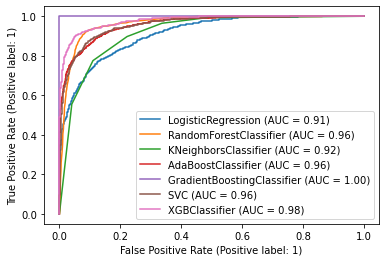

In [69]:
plt.figure(figsize=(15,15), facecolor='white')
show = plot_roc_curve(Log_reg,X_test, y_pred)
plot_roc_curve(ran_clf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(knn_clf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(ada_clf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(gb_grid,X_test, y_pred,ax=show.ax_) 
plot_roc_curve(svc_clf,X_test, y_pred,ax=show.ax_) 
plot_roc_curve(xgb_clf,X_test, y_pred,ax=show.ax_) 


plt.show()

We can see that Gradient boosting algorithm model is giving the highest AUC which proves that Gradient boosting is best fit model

## Saving the Best Model

In [70]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Rainfall predictoin_clf.pkl','wb')

#dump the information to the file
pickle.dump(gb_grid,file)

b) Rain tommorow or not

We have Rainfall as the target variable in this problem, hence we use classification methods.

## 1. Linear Regression

We have to make the rainfall as target variable

In [71]:
X = data.drop(columns=['Rainfall'], axis=1)
y = data['Rainfall']

In [72]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(X)

In [73]:
X_train,X_test, y_train, y_test = train_test_split(X_scalar, y, random_state=24, test_size=0.25)

## 1. Linear Regression

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)
lm= LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(lm,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.4895348260779293
The mean Abs error: 1.5879843814276995
The mean squared error: 1.5879843814276995
The RMS error: 1.2601525230811148
[0.51138795 0.47949271 0.48201471 0.45689303 0.52939141]
The cross validation score of model: 0.4918359639350334
*****************************


## Lasso

In [75]:
lass = Lasso()
lass.fit(X_train, y_train)
y_pred = lass.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(lass,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.2216942372390983
The mean Abs error: 2.354465301881501
The mean squared error: 2.354465301881501
The RMS error: 1.5344267013713953
[0.24098436 0.14695207 0.13082595 0.12317298 0.24713377]
The cross validation score of model: 0.17781382719023384
*****************************


## Ridge

In [76]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(ridge_reg,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.4895793529460264
The mean Abs error: 1.5878957867762689
The mean squared error: 1.5878957867762689
The RMS error: 1.2601173702382922
[0.51142966 0.47947203 0.48199991 0.45688999 0.52932877]
The cross validation score of model: 0.49182407451140664
*****************************


## 2. Random Forest

In [77]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("***********RESULTS***********")
print('The r2score:',r2_score(y_test, y_pred))
print('The mean Abs error:',mean_absolute_error(y_test, y_pred))
print('The mean squared error:',mean_absolute_error(y_test, y_pred))
print('The RMS error:',np.sqrt(mean_absolute_error(y_test, y_pred)))

cv = cross_val_score(random_forest,X, y,cv = 5)
print(cv)

print('The cross validation score of model:', cv.mean())
print("*****************************")

***********RESULTS***********
The r2score: 0.6260759597342958
The mean Abs error: 1.1452315394242802
The mean squared error: 1.1452315394242802
The RMS error: 1.070154913750472
[0.47969277 0.55604639 0.71507066 0.60845575 0.55671851]
The cross validation score of model: 0.5831968150478974
*****************************


## 3. XGB Regressor

In [78]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)


print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(xgbr,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

********************The Results*************************
Accuracy:  60.649124939178314
Cross Validation Score for cv= 2 is 0.4573472055120535
Cross Validation Score for cv= 3 is 0.46888987398684384
Cross Validation Score for cv= 4 is 0.4183581975748147
Cross Validation Score for cv= 5 is 0.532824769984113
Cross Validation Score for cv= 6 is 0.557281386519846
Cross Validation Score for cv= 7 is 0.5676372228003069
Cross Validation Score for cv= 8 is 0.5994516920626681
Cross Validation Score for cv= 9 is 0.6335621875743612
Cross Validation Score for cv= 10 is 0.6456793077845124
Cross Validation Score for cv= 11 is 0.6426262238885492
Cross Validation Score for cv= 12 is 0.6683348557319785
Cross Validation Score for cv= 13 is 0.654419413764215
Cross Validation Score for cv= 14 is 0.6541317861373498
The mean absolute error 1.143315053999954
The mean squared error 9.104532750749895
root mean square error 3.0173718283880584
************************************************************


## 4. Decision Tree Regressor()

In [79]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)


print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(dec_reg,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

********************The Results*************************
Accuracy:  23.12843383131917
Cross Validation Score for cv= 2 is 0.025604542344367043
Cross Validation Score for cv= 3 is 0.17068464995804766
Cross Validation Score for cv= 4 is 0.03158566549744682
Cross Validation Score for cv= 5 is 0.26026379456617815
Cross Validation Score for cv= 6 is 0.2507416309744741
Cross Validation Score for cv= 7 is 0.22536628300459732
Cross Validation Score for cv= 8 is 0.29323073513048226
Cross Validation Score for cv= 9 is 0.36604169531704384
Cross Validation Score for cv= 10 is 0.3982785882115118
Cross Validation Score for cv= 11 is 0.39522751921260985
Cross Validation Score for cv= 12 is 0.4398133847471483
Cross Validation Score for cv= 13 is 0.38729737944943676
Cross Validation Score for cv= 14 is 0.4061634862580843
The mean absolute error 1.3468919482686692
The mean squared error 17.785619524405508
root mean square error 4.217300027790945
**********************************************************

## Hyperparameter optimization

In [80]:
params = {'n_estimators':[20,30,40,50],
          'max_depth':[9,12,14,17,19],
          'min_samples_split':[8,12,15,19],
          'min_samples_leaf':[12,19,25,40]
    }
ran_reg = RandomForestRegressor()
RF_grid  = GridSearchCV(estimator=ran_reg,param_grid=params, verbose=2, n_jobs=10, )
RF_grid.fit(X_train, y_train)
RF_grid.best_params_

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


{'max_depth': 19,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 40}

In [81]:
ran_reg = RandomForestRegressor(max_depth=9, min_samples_leaf=12,min_samples_split=19, n_estimators=50)
ran_reg.fit(X_train, y_train)
y_pred = ran_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", r2_score(y_test,y_pred))


CV=cross_val_score(ran_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.5499519693907726

 The CV score of Model : 0.5586652892722919
The mean absolute error 1.2876296324830416
The mean squared error 10.41267069095424
root mean square error 3.2268670085632967
*******************************************


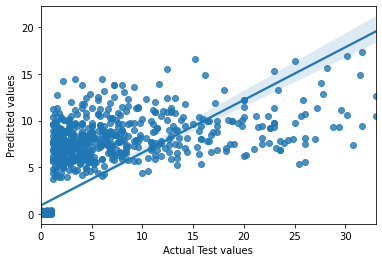

In [82]:
sns.regplot(y_test,y_pred)
plt.xlabel("Actual Test values")
plt.ylabel("Predicted values")
plt.show()

In [83]:
#save the model 

#open a file where you want to store the dat
file = open('Rainfall predictoin_reg.pkl','wb')

#dump the information to the file
pickle.dump(ran_reg,file)